In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
# Mean Squared Error Loss Function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [12]:
# Neural Network Class
class SimpleNN:

    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.random.randn(1, hidden_size)
        self.bias_output = np.random.randn(1, output_size)

    def forward(self, X):
        # Forward pass through the network
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.output_input  # Linear output for regression
        return self.output

    def backward(self, X, y, learning_rate=0.01):
        # Backpropagation to update weights and biases
        output_error = y - self.output
        d_output = output_error

        # Calculate gradients for weights and biases
        hidden_error = d_output.dot(self.weights_hidden_output.T) * sigmoid_derivative(self.hidden_output)

        # Update weights and biases using gradient descent(Optimizer)
        self.weights_input_hidden += X.T.dot(hidden_error) * learning_rate
        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden += np.sum(hidden_error, axis=0, keepdims=True) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                loss = mse_loss(y, self.output)
                print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward(X)

In [13]:
# Example dataset (Input and Output)
X = np.array([[0], [1], [2], [3], [4]])  # Input (features)
y = np.array([[0], [1], [4], [9], [16]])  # Output (squared input, for regression)

# Initialize and train the neural network
nn = SimpleNN(input_size=1, hidden_size=5, output_size=1)  # Simple network with 1 input, 1 hidden, and 1 output
nn.train(X, y, epochs=1000, learning_rate=0.01)

Epoch 0/1000, Loss: 56.0634
Epoch 100/1000, Loss: 2.4742
Epoch 200/1000, Loss: 0.5624
Epoch 300/1000, Loss: 0.2158
Epoch 400/1000, Loss: 0.1116
Epoch 500/1000, Loss: 0.0717
Epoch 600/1000, Loss: 0.0527
Epoch 700/1000, Loss: 0.0417
Epoch 800/1000, Loss: 0.0343
Epoch 900/1000, Loss: 0.0289


In [15]:
# Make predictions on the training data
predictions = nn.predict(X)
predictions

array([[ 0.0479415 ],
       [ 1.03559238],
       [ 3.81245742],
       [ 9.2463226 ],
       [15.8450854 ]])

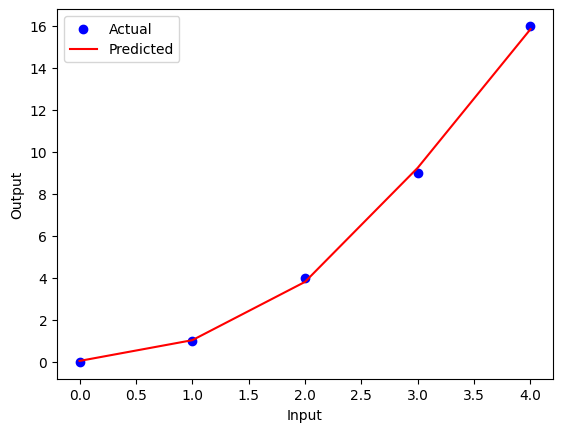

In [16]:
# Visualize the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predictions, color='red', label='Predicted')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
